<a href="https://colab.research.google.com/github/KPxto/bootcamp-alura/blob/master/Projeto_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>COVID no estado da Bahia</center> 
>**Autor: Kaio Peixoto**

- [Linkedin](https://www.linkedin.com/in/kaiopeixoto/)
- [Github](https://github.com/KPxto)

<br>

Este notebook analisa os dados da COVID-19 disponibilizados pelo portal Brasil.io através deste [link](https://brasil.io/dataset/covid19/caso/). 
<br>

Os dados são apresentados diariamente pelas secretarias estaduais e municipais de saúde e coletados/compilados pela equipe de voluntarios do Brasil.io.
<br>

Este estudo visa analisar especificamente a situação do estado da Bahia e suas microrregiões, ou, regiões intermediárias e imediatas. Segundo o wikipedia, as microrregiões *"são agrupamentos de regiões imediatas que são articuladas através da influência de uma metrópole, capital regional ou centro urbano representativo dentro do conjunto"*.

Dentro de um mesmo estado podem existir realidades bem distintas entre as subdivisões. Para um estado de grandes proporções como a Bahia pode ser mais interessante analisarmos cada região dessa para que o governo estadual possa alocar recursos onde mais se precisa, atuando efetivamente contra os efeitos da pandemia.
<br>

O IBGE dividiu a Bahia em 32 regiões intermediárias e imediatas e nosso estudo vai se basear fazendo um comparativo entre as mesmas.



## Resumo:

Questões e hipóteses:

- Como a pandemia tem se comportado dentre as diferentes microrregiões da Bahia?
- Quantos confirmados a cada 100 mil e qual a mortalidade da doença?
- O índice de mortalidade está relacionado com o nível de gasto na saúde por região? **(verificar se tem dados para validar essa hipotese)**
- Os maiores picos da doença ocorreram na mesma época em todas regiões ou em momentos diferentes?
- Qual microrregião está mais preparada e menos preparada para uma possível segunda onda da doença?
- Onde estão as cidades em que a doença foi mais controlada?
- Como Salvador tem respondido à pandemia em relação às outras capitais do nordeste?
- Tirar a media de cada regiao considerando somente as capitais e fazer um comparativo
- Fazer uma distribuicao da população das cidades da Bahia cujo óbito por covid foi zero
- Primeiro vamos comparar os numeros da Bahia com os dos outros estados do NE e tbm do Brasil
- Calcular a media movel

## Cidades e microrregiões

De início, vamos logo organizar as subdivisões da Bahia em listas com suas respectivas cidades.

In [1]:
b='''Baianópolis
Barreiras
Catolândia
Formosa do Rio Preto
Luís Eduardo Magalhães
Riachão das Neves
São Desidério'''

barreiras = b.split('\n')

c='''Angical
Brejolândia
Cotegipe
Cristópolis
Mansidão
Santa Rita de Cássia
Tabocas do Brejo Velho
Wanderley'''

cotegipe = c.split('\n')

smv='''Canápolis
Cocos
Coribe
Correntina
Jaborandi
Santa Maria da Vitória
Santana
São Félix do Coribe
Serra Dourada'''

sta_maria_vit = smv.split('\n')

j='''Campo Alegre de Lourdes
Casa Nova
Curaçá
Juazeiro
Pilão Arcado
Remanso
Sento Sé
Sobradinho'''

juazeiro = j.split('\n')

pa='''Abaré
Chorrochó
Glória
Macururé
Paulo Afonso
Rodelas'''

paulo_afonso = pa.split('\n')

barra='''Barra
Buritirama
Ibotirama
Itaguaçu da Bahia
Morpará
Muquém do São Francisco
Xique-Xique'''

barra = barra.split('\n')

bj='''Bom Jesus da Lapa
Carinhanha
Feira da Mata
Paratinga
Serra do Ramalho
Sítio do Mato'''

bom_jesus_lapa = bj.split('\n')

sdb='''Andorinha
Antônio Gonçalves
Campo Formoso
Filadélfia
Itiúba
Jaguarari
Pindobaçu
Senhor do Bonfim
Umburanas'''

senhor_bonfim = sdb.split('\n')

ir='''América Dourada
Barra do Mendes
Barro Alto
Cafarnaum
Canarana
Central
Gentio do Ouro
Ibipeba
Ibititá
Iraquara
Irecê
João Dourado
Jussara
Lapão
Mulungu do Morro
Presidente Dutra
São Gabriel
Souto Soares
Uibaí'''

irece = ir.split('\n')

jac='''Caém
Caldeirão Grande
Capim Grosso
Jacobina
Miguel Calmon
Mirangaba
Morro do Chapéu
Ourolândia
Piritiba
Ponto Novo
Quixabeira
São José do Jacuípe
Saúde
Serrolândia
Várzea do Poço
Várzea Nova'''

jacobina = jac.split('\n')

itab='''Baixa Grande
Boa Vista do Tupim
Iaçu
Ibiquera
Itaberaba
Lajedinho
Macajuba
Mairi
Mundo Novo
Ruy Barbosa
Tapiramutá
Várzea da Roça'''

itaberada = itab.split('\n')

fs='''Água Fria
Anguera
Antônio Cardoso
Conceição da Feira
Conceição do Jacuípe
Coração de Maria
Elísio Medrado
Feira de Santana
Ipecaetá
Ipirá
Irará
Itatim
Ouriçangas
Pedrão
Pintadas
Rafael Jambeiro
Santa Bárbara
Santa Teresinha
Santanópolis
Santo Estêvão
São Gonçalo dos Campos
Serra Preta
Tanquinho
Teodoro Sampaio'''

feira_santana = fs.split('\n')

jer='''Coronel João Sá
Jeremoabo
Pedro Alexandre
Santa Brígida
Sítio do Quinto'''

jeremoabo = jer.split('\n')

euc='''Cansanção
Canudos
Euclides da Cunha
Monte Santo
Nordestina
Queimadas
Quijingue
Tucano
Uauá'''

euclides_cunha = euc.split('\n')

rp='''Adustina
Antas
Banzaê
Cícero Dantas
Cipó
Fátima
Heliópolis
Itapicuru
Nova Soure
Novo Triunfo
Olindina
Paripiranga
Ribeira do Amparo
Ribeira do Pombal'''

rib_pombal = rp.split('\n')

ser='''Araci
Barrocas
Biritinga
Candeal
Capela do Alto Alegre
Conceição do Coité
Gavião
Ichu
Lamarão
Nova Fátima
Pé de Serra
Retirolândia
Riachão do Jacuípe
Santaluz
São Domingos
Serrinha
Teofilândia
Valente'''

serrinha = ser.split('\n')

ala='''Acajutiba
Alagoinhas
Aporá
Araçás
Aramari
Crisópolis
Inhambupe
Rio Real
Sátiro Dias'''

alagoinhas = ala.split('\n')

entre='''Cardeal da Silva
Conde
Entre Rios
Esplanada
Jandaíra'''

entre_rios = entre.split('\n')

catu='''Amélia Rodrigues
Catu
Itanagra
Mata de São João
Pojuca
São Sebastião do Passé
Terra Nova'''

catu = catu.split('\n')

saj='''Aratuípe
Cabaceiras do Paraguaçu
Cachoeira
Castro Alves
Conceição do Almeida
Cruz das Almas
Dom Macedo Costa
Governador Mangabeira
Jaguaripe
Maragogipe
Muniz Ferreira
Muritiba
Nazaré
Salinas da Margarida
Santo Amaro
Santo Antônio de Jesus
São Felipe
São Félix
Sapeaçu
Saubara
Varzedo'''

sto_antonio = saj.split('\n')

ssa='''Camaçari
Candeias
Dias d'Ávila
Itaparica
Lauro de Freitas
Madre de Deus
Salvador
São Francisco do Conde
Simões Filho
Vera Cruz'''

salvador = ssa.split('\n')

boq='''Boquira
Botuporã
Brotas de Macaúbas
Caturama
Ibipitanga
Ibitiara
Ipupiara
Macaúbas
Novo Horizonte
Oliveira dos Brejinhos
Tanque Novo'''

boquira = boq.split('\n')

sea='''Abaíra
Andaraí
Barra da Estiva
Boninal
Bonito
Contendas do Sincorá
Ibicoara
Itaeté
Jussiape
Lençóis
Mucugê
Nova Redenção
Palmeiras
Piatã
Rio de Contas
Seabra
Utinga
Wagner'''

seabra = sea.split('\n')

jeq='''Aiquara
Amargosa
Apuarema
Brejões
Cravolândia
Irajuba
Iramaia
Itagi
Itaquara
Itiruçu
Jaguaquara
Jequié
Jiquiriçá
Jitaúna
Lafaiete Coutinho
Laje
Lajedo do Tabocal
Maracás
Marcionílio Souza
Milagres
Mutuípe
Nova Itarana
Planaltino
Santa Inês
São Miguel das Matas
Ubaíra'''

jequie = jeq.split('\n')

livbru='''Dom Basílio
Érico Cardoso
Livramento de Nossa Senhora
Paramirim
Rio do Pires'''

liv_brumado = livbru.split('\n')

gbi='''Caculé
Caetité
Candiba
Guanambi
Ibiassucê
Igaporã
Iuiu
Jacaraci
Lagoa Real
Licínio de Almeida
Malhada
Matina
Mortugaba
Palmas de Monte Alto
Pindaí
Riacho de Santana
Sebastião Laranjeiras
Urandi'''

guanambi = gbi.split('\n')

bru='''Aracatu
Brumado
Caraíbas
Condeúba
Cordeiros
Guajeru
Ituaçu
Maetinga
Malhada de Pedras
Piripá
Presidente Jânio Quadros
Rio do Antônio
Tanhaçu
Tremedal'''

brumado = bru.split('\n')

vdc='''Anagé
Barra do Choça
Belo Campo
Boa Nova
Bom Jesus da Serra
Caatiba
Caetanos
Cândido Sales
Dário Meira
Ibicuí
Iguaí
Manoel Vitorino
Mirante
Nova Canaã
Planalto
Poções
Vitória da Conquista'''

vit_conquista = vdc.split('\n')

itap='''Encruzilhada
Itambé
Itapetinga
Itarantim
Itororó
Macarani
Maiquinique
Potiraguá
Ribeirão do Largo'''

itapetinga = itap.split('\n')

val='''Cairu
Camamu
Igrapiúna
Ituberá
Maraú
Nilo Peçanha
Piraí do Norte
Presidente Tancredo Neves
Taperoá
Valença'''

valenca = val.split('\n')

iositb='''Almadina
Arataca
Aurelino Leal
Barra do Rocha
Barro Preto
Belmonte
Buerarema
Camacan
Canavieiras
Coaraci
Firmino Alves
Floresta Azul
Gandu
Gongogi
Ibicaraí
Ibirapitanga
Ibirataia
Ilhéus
Ipiaú
Itabuna
Itacaré
Itagibá
Itaju do Colônia
Itajuípe
Itamari
Itapé
Itapebi
Itapitanga
Jussari
Mascote
Nova Ibiá
Pau Brasil
Santa Cruz da Vitória
Santa Luzia
São José da Vitória
Teolândia
Ubaitaba
Ubatã
Una
Uruçuca
Wenceslau Guimarães'''

ios_itabuna = iositb.split('\n')

pseg='''Alcobaça
Caravelas
Eunápolis
Guaratinga
Ibirapuã
Itabela
Itagimirim
Itamaraju
Itanhém
Jucuruçu
Lajedão
Medeiros Neto
Mucuri
Nova Viçosa
Porto Seguro
Prado
Santa Cruz Cabrália
Teixeira de Freitas
Vereda'''

porto_seguro = pseg.split('\n')

## Importando Bibliotecas e preparando notebook

In [2]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
from folium.plugins import HeatMap
from branca.element import Figure

%matplotlib inline

# escolhendo estilo de plotagem
plt.style.use('fivethirtyeight')

# setando opção de visualização do número
pd.options.display.float_format = '{:.2f}'.format

#### Carregando nosso dataframe

    - Para a coluna 'city', os valores nulos vem como NA ou 'Importados/Indefinidos'
    - Para facilitar nosso trabalho de limpeza configuramos o pandas para que considere como NA todos valores descritos 'Importados/Indefinidos' na coluna 'city'

In [3]:
df = pd.read_csv('caso.csv.gz', na_values=['Importados/Indefinidos'])

In [4]:
# vamos pegar 5 dados aleatorios para conhecer nosso conjunto de dados
df.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
323237,2020-07-30,PA,São Domingos do Capim,city,95,3,95,False,31989.00,32139.00,1507201.00,295.59,0.03
281438,2020-07-24,MA,São Vicente Ferrer,city,142,1,85,False,22247.00,22350.00,2111706.00,635.35,0.01
594375,2020-06-18,PI,Massapê do Piauí,city,1,0,3,False,6441.00,6449.00,2206050.00,15.51,0.00
745149,2020-07-13,RS,Caseiros,city,12,0,67,False,3202.00,3216.00,4304952.00,373.13,0.00
603455,2020-10-23,PI,Ribeiro Gonçalves,city,401,5,164,False,7341.00,7376.00,2208908.00,5436.55,0.01


<br>

## Checando valores nulos e tipos de dados

Antes de verificarmos tipos de dados e valores nulos, vamos verificar o tamanho do nosso dataframe

In [5]:
print(f'Nosso dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

Nosso dataset tem 1037201 linhas e 13 colunas.


<br>
Desse total de linhas quantas são valores NA por coluna?

Vamos achar essa resposta com o codigo abaixo

In [6]:
df.isna().sum()

date                                  0
state                                 0
city                              10827
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3987
estimated_population               3987
city_ibge_code                     3987
confirmed_per_100k_inhabitants    17649
death_rate                            0
dtype: int64

<br>
Agora veremos quantos valores válidos por coluna e seus respectivos tipos de dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037201 entries, 0 to 1037200
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   date                            1037201 non-null  object 
 1   state                           1037201 non-null  object 
 2   city                            1026374 non-null  object 
 3   place_type                      1037201 non-null  object 
 4   confirmed                       1037201 non-null  int64  
 5   deaths                          1037201 non-null  int64  
 6   order_for_place                 1037201 non-null  int64  
 7   is_last                         1037201 non-null  bool   
 8   estimated_population_2019       1033214 non-null  float64
 9   estimated_population            1033214 non-null  float64
 10  city_ibge_code                  1033214 non-null  float64
 11  confirmed_per_100k_inhabitants  1019552 non-null  float64
 12  

>A coluna **date** está como *string* e deverá ser convertida para tipo *data*

<br>

Conforme sugerido pela própria documentação para ser desconsiderada por possuir valores desatualizados, vamos excluir a coluna **estimated_population_2019**

In [8]:
df.drop('estimated_population_2019', axis=1, inplace=True)

Também vamos fazer a conversão da coluna **date**

In [9]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

<br>

## Separando dataframes...

Considerando que os valores NA da coluna **city** ocorrem quando o registro refere-se a estado (descrito como *state* na coluna **place_type**), vamos criar um dataframe somente para dados relacionados às cidades.

<br>
Mais tarde também faremos um dataframe que considerará somente estados e analisaremos essas duas entidades separadamente.

In [10]:
# vamos filtrar as linhas onde a coluna city não é nula e atribuí-la a variável df_cidade
df_cidade = df[df['city'].notnull()]
# uma amostra aleatório de 5 linhas
df_cidade.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
668657,2020-06-09,PR,Rancho Alegre,city,5,1,15,False,3784.00,4121307.00,132.14,0.20
119572,2020-10-24,GO,Itapaci,city,420,11,152,False,23421.00,5210901.00,1793.26,0.03
433098,2020-10-19,MG,Itapeva,city,492,14,188,False,9881.00,3133600.00,4979.25,0.03
786329,2020-07-19,RS,Porto Alegre,city,6337,204,128,False,1488252.00,4314902.00,425.80,0.03
315278,2020-08-12,PA,Oeiras do Pará,city,473,21,131,False,32850.00,1505205.00,1439.88,0.04


<br>

Para provar que **df_cidade** traz somente dados das cidades vamos checar os valores únicos da coluna **place_type**

In [11]:
print(f"O unico valor presente na coluna place_type é --> '{df_cidade['place_type'].unique()[0]}'")

O unico valor presente na coluna place_type é --> 'city'


In [12]:
# excluindo a coluna place_type já que a mesma não faz mais sentido nesse dataframe
# tentei remover a coluna com drop, mas estava dando aviso de 'Setting copy with error'
# da maneira executada abaixo, parecido com dicionario, nao gerou alerta
del df_cidade['place_type']

Vamos identificar se sobrou valor nulo em algumas das colunas de **df_cidade**

In [13]:
df_cidade.isna().sum()

date                                  0
state                                 0
city                                  0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population                  0
city_ibge_code                        0
confirmed_per_100k_inhabitants    13656
death_rate                            0
dtype: int64

<br>

>Segundo documentação, a coluna **confirmed_per_100k_inhabitants** é calculada dividindo o número de casos confirmados por 100.000 (baseado em estimated_population). A nossa hipótese é que quando a coluna de casos confirmados for igual a 0 o resultado será um NaN. 

>Confirmando a hipótese, vamos consertar isso substituindo valores nulos pelo número 0, já que não houve morte.
Usaremos o método fillna()

<br>

- Primeiro criamos um df onde todos valores de 'confirmado por 100K' são nulos
- Depois confirmamos que o único valor da coluna casos cofirmados é 0
- Esse procedimento é útil para termos certeza da nossa hipótese

In [14]:
confirmado_por_100k = df_cidade[df_cidade['confirmed_per_100k_inhabitants'].isna()]
confirmado_por_100k['confirmed'].unique()

array([0], dtype=int64)

<br>
Usando o metodo fillna()

In [15]:
df_cidade['confirmed_per_100k_inhabitants'].fillna(0, inplace=True)

c:\python\python37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<br>

Se formos buscar os valores nulos novamente veremos que df_cidade está tudo em ordem

In [16]:
df_cidade.isna().sum()

date                              0
state                             0
city                              0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [17]:
df_cidade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026374 entries, 246 to 1037200
Data columns (total 11 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   date                            1026374 non-null  datetime64[ns]
 1   state                           1026374 non-null  object        
 2   city                            1026374 non-null  object        
 3   confirmed                       1026374 non-null  int64         
 4   deaths                          1026374 non-null  int64         
 5   order_for_place                 1026374 non-null  int64         
 6   is_last                         1026374 non-null  bool          
 7   estimated_population            1026374 non-null  float64       
 8   city_ibge_code                  1026374 non-null  float64       
 9   confirmed_per_100k_inhabitants  1026374 non-null  float64       
 10  death_rate                      1026374 

>Todas colunas com o mesmo número de não-nulos

<br>

In [18]:
# checando duplicidade
# nenhuma ocorrencia de valores duplicados
df_cidade.duplicated().value_counts()

False    1026374
dtype: int64

<br>

Criando a nova coluna de região

In [19]:
regiao = {'AC':'Norte', 'AM':'Norte', 'RR':'Norte', 'RO':'Norte', 'AP':'Norte', 'PA':'Norte', 'TO':'Norte',
          'MA':'Nordeste', 'PI':'Nordeste', 'CE':'Nordeste', 'RN':'Nordeste', 'PB':'Nordeste', 'PE':'Nordeste',
         'AL':'Nordeste', 'SE':'Nordeste', 'BA':'Nordeste', 'MG':'Sudeste', 'ES':'Sudeste', 'RJ':'Sudeste',
         'SP':'Sudeste', 'PR':'Sul', 'SC':'Sul', 'RS':'Sul', 'MS':'Centro-Oeste', 'GO':'Centro-Oeste', 
         'MT':'Centro-Oeste', 'DF':'Centro-Oeste'}

In [20]:
df_cidade['region'] = df_cidade['state'].map(regiao)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<br>

Considerando que o indicador 'is_last' traz as informações mais recentes sobre numero de mortes e casos confirmados, vamos criar um dataframe com esses dados. 
<br>

Sera útil para fazermos comparações entre as cidades.

In [21]:
# df considerando o ultimo boletim por cidade
df_cidade_last = df_cidade[df_cidade['is_last']==True]

In [22]:
cidades_ba = df_cidade[df_cidade['state']=='BA']
cidades_se = df_cidade[df_cidade['state']=='SE']
cidades_al = df_cidade[df_cidade['state']=='AL']
cidades_pe = df_cidade[df_cidade['state']=='PE']
cidades_pb = df_cidade[df_cidade['state']=='PB']
cidades_rn = df_cidade[df_cidade['state']=='RN']
cidades_ce = df_cidade[df_cidade['state']=='CE']
cidades_pi = df_cidade[df_cidade['state']=='PI']
cidades_ma = df_cidade[df_cidade['state']=='MA']

In [23]:
ne = df_cidade[df_cidade['region']=='Nordeste']

In [24]:
ne_sem_ba = ne[ne['state']!='BA']
ne_grupo = ne_sem_ba[ne_sem_ba['is_last']==True].groupby('city').sum()
n = ne_grupo['confirmed_per_100k_inhabitants'].mean()

<br>

## Análise exploratória dos dados

In [25]:
cidades_ba.sample(2)

,date,state,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
188147,2020-08-01,BA,Lamarão,52,0,71,False,8191.00,2919108.00,634.84,0.00,Nordeste
160589,2020-08-07,BA,Castro Alves,222,3,112,False,26318.00,2907301.00,843.53,0.01,Nordeste


In [26]:
b = cidades_ba.groupby('date').sum().diff()
p = cidades_pe.groupby('date').sum().diff()
c = cidades_ce.groupby('date').sum().diff()
n = ne_sem_ba.groupby('date').sum().diff()

In [27]:
# vamos agrupar por data para facilitar em alguns calculos
cidades_ba_group = cidades_ba.groupby('date').sum()

# criando colunas com novas mortes e novos óbitos por dia
cidades_ba_group['new_confirmed'] = cidades_ba_group['confirmed'].diff()
cidades_ba_group['new_deaths'] = cidades_ba_group['deaths'].diff()

In [28]:
cidades_ba_group.drop(['order_for_place', 'is_last', 'estimated_population',
                      'city_ibge_code'], axis=1, inplace=True)

In [29]:
# criando a coluna de media movel para casos confirmados e mortes

cidades_ba_group['mv_confirmed'] = cidades_ba_group['new_confirmed'].rolling(7).mean()
cidades_ba_group['mv_deaths'] = cidades_ba_group['new_deaths'].rolling(7).mean()
cidades_ba_group.head(8)

,confirmed,deaths,confirmed_per_100k_inhabitants,death_rate,new_confirmed,new_deaths,mv_confirmed,mv_deaths
date,,,,,,,,
2020-03-06,1,0,0.16,0.00,nan,nan,nan,nan
2020-03-07,2,0,0.32,0.00,1.00,0.00,nan,nan
2020-03-09,2,0,0.32,0.00,0.00,0.00,nan,nan
2020-03-10,2,0,0.32,0.00,0.00,0.00,nan,nan
2020-03-11,3,0,0.48,0.00,1.00,0.00,nan,nan
2020-03-12,3,0,0.48,0.00,0.00,0.00,nan,nan
2020-03-13,7,0,0.75,0.00,4.00,0.00,nan,nan
2020-03-15,9,0,0.95,0.00,2.00,0.00,1.14,0.00


### Médias móveis

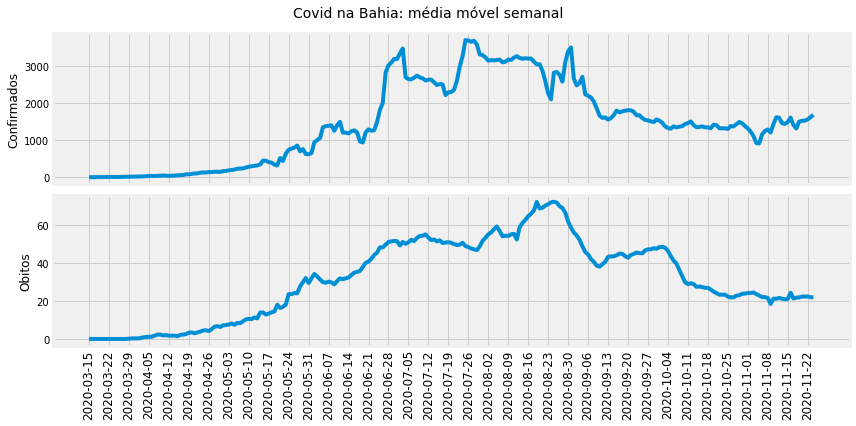

In [30]:
fig, ax = plt.subplots(2,figsize=(12,6), tight_layout=True, sharex=True)

ax[0].plot(cidades_ba_group['mv_confirmed'].index, cidades_ba_group['mv_confirmed'].values)
ax[0].xaxis.set_major_locator(ticker.IndexLocator(base=7, offset=0))
ax[0].set_ylabel('Confirmados')

ax[1].plot(cidades_ba_group['mv_deaths'].index, cidades_ba_group['mv_deaths'].values)
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=7, offset=0))
ax[1].set_ylabel('Obitos')

plt.xticks(rotation=90, fontsize=12)
plt.suptitle('Covid na Bahia: média móvel semanal', fontsize=14);


In [31]:
micro_regioes = {'Barreiras':tuple(barreiras), 'Cotegipe':tuple(cotegipe), 'Sta Maria da Vitoria':tuple(sta_maria_vit),
                'Juazeiro':tuple(juazeiro), 'Paulo Afonso':tuple(paulo_afonso), 'Barra':tuple(barra), 'B. Jesus da Lapa':tuple(bom_jesus_lapa),
                'Senhor do Bonfim':tuple(senhor_bonfim), 'Irece':tuple(irece), 'Jacobina':tuple(jacobina), 'Itaberaba':tuple(itaberada), 
                'Feira de Santana':tuple(feira_santana), 'Jeremoabo':tuple(jeremoabo), 'Euclides da Cunha':tuple(euclides_cunha),
                'Ribeira do Pombal':tuple(rib_pombal), 'Serrinha':tuple(serrinha), 'Alagoinhas':tuple(alagoinhas), 'Entre Rios':tuple(entre_rios),
                'Catu':tuple(catu), 'Sto Ant de Jesus':tuple(sto_antonio), 'Salvador':tuple(salvador), 'Boquira':tuple(boquira), 'Seabra':tuple(seabra),
                'Jequie':tuple(jequie), 'Livramento do Brumado':tuple(liv_brumado), 'Guanambi':tuple(guanambi), 'Brumado':tuple(brumado), 
                'Vit da Conquista':tuple(vit_conquista), 'Itapetinga':tuple(itapetinga), 'Valenca':tuple(valenca), 'Porto Seguro':tuple(porto_seguro),
                'Ilheus-Itabuna':tuple(ios_itabuna)}

In [32]:
d = {}
x = ''
for i in cidades_ba['city'].unique():
    for m in micro_regioes.keys():
        if i in micro_regioes[m]:
            d[i] = m
        else:
            x = 'Sem'

In [33]:
cidades_ba['micro_region'] = cidades_ba['city'].map(d)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
cidades_ba[cidades_ba['micro_region'].isna()]['city'].unique()

array([], dtype=object)

In [35]:
cidades_ba.groupby('city').sum()['confirmed_per_100k_inhabitants'].mean()

179039.87039163068

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

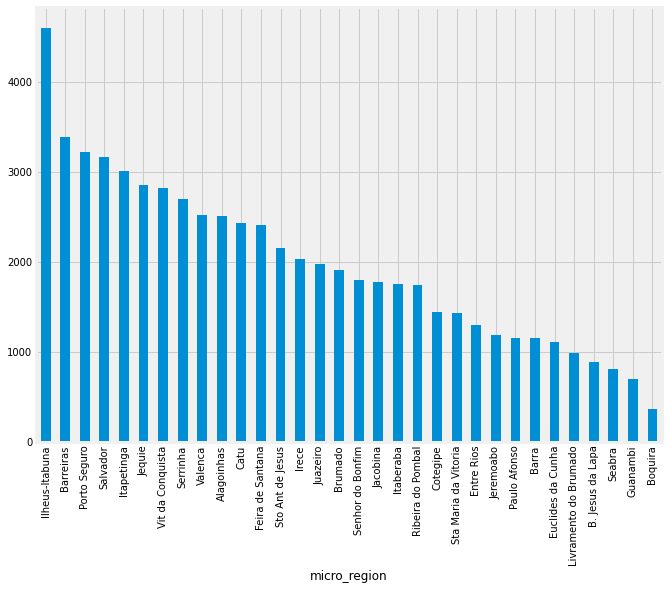

In [36]:
micro_reg = cidades_ba[cidades_ba['is_last']==True].groupby('micro_region').sum()
micro_reg['death_rate'] = micro_reg['deaths'] / micro_reg['confirmed']
micro_reg['confirmed_per_100k_inhabitants'] = micro_reg['confirmed']/(micro_reg['estimated_population']/100000)
micro_reg['confirmed_per_100k_inhabitants'].sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
plt.axhline(n, alpha=0.5, color='red')
plt.xlabel('microrregião')
plt.title('Casos confirmados por 100 mil habitantes', fontsize=14);

In [ ]:
(cidades_ba[cidades_ba['is_last']==True]['deaths'].sum())/(cidades_ba[cidades_ba['is_last']==True]['estimated_population'].sum()/100000)

In [ ]:
(micro_reg['death_rate']*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,8));

In [ ]:
(286862.00/100000)/7237

In [ ]:
ax = (micro_reg['estimated_population']/1000000).sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} mi'))


In [ ]:
micro_reg

In [ ]:
ax = cidades_ba_group['new_deaths'].plot(figsize=(16,8))
plt.title('Novas mortes por dia')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=7,offset=0))
plt.xticks(rotation=90);

In [ ]:
cidades_ba.groupby('date').sum()

In [ ]:
plt.plot(c.index, c['deaths'])

In [ ]:
contrato = pd.read_csv('deaths_brazil.csv')

In [ ]:
contrato

## Estados

In [ ]:
df_estados = df[df['place_type']=='state']
df_estados.loc[df_estados['date'].apply(lambda x: x.month)==7]

In [ ]:
d = pd.Timedelta(365,'D')

In [ ]:
mortes = pd.read_csv('deaths_brazil.csv')
#mortes.groupby(['year', 'month']).sum()['deaths'].loc[1970].pct_change(freq=2)
mortes.head()

In [ ]:
for i in np.arange(1970,2021):
    mortes.groupby(['year', 'month']).sum()['deaths'].loc[i][2:8]
    

In [ ]:
pivot = pd.pivot_table(data=mortes,index='month', columns='year')[1:8].pct_change(axis=1)
pivot = pivot[1:]
pivot

In [ ]:
pivot = pivot.T.loc['deaths']

In [ ]:
pivot.columns

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(pivot)
handles = pivot.columns
plt.legend(handles);

In [ ]:
prices = {
'ACME': 45.23,
'AAPL': 612.78,
'IBM': 205.55,
'HPQ': 37.20,
'FB': 10.75
}

In [ ]:
p = {
'ACME': 45.23,
'AAPL': 612.78}

In [ ]:
prices.keys()

In [ ]:
pd.read_csv('Banco Estadual COVID-19 CONFIRMADOS_26-11-2020.csv', encoding='latin1', sep=';').iloc[0]

In [ ]:
geo = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "stroke": "#555555",
        "stroke-width": 2,
        "stroke-opacity": 1,
        "fill": "#555555",
        "fill-opacity": 0.5,
        "bairro": "centro"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -39.59378242492675,
              -14.865906408017787
            ],
            [
              -39.59000587463379,
              -14.868063301135761
            ],
            [
              -39.58528518676758,
              -14.866984857271085
            ],
            [
              -39.58296775817871,
              -14.862753986999232
            ],
            [
              -39.585714340209954,
              -14.861509597609741
            ],
            [
              -39.59429740905762,
              -14.861011839845801
            ],
            [
              -39.59378242492675,
              -14.865906408017787
            ]
          ]
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "stroke": "#555555",
        "stroke-width": 2,
        "stroke-opacity": 1,
        "fill": "#555555",
        "fill-opacity": 0.5,
        "bairro": "bela vista"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -39.5851993560791,
              -14.866735984844745
            ],
            [
              -39.58245277404785,
              -14.875114532038921
            ],
            [
              -39.57867622375488,
              -14.875031577720888
            ],
            [
              -39.57841873168945,
              -14.87071790922756
            ],
            [
              -39.58125114440918,
              -14.867067814682768
            ],
            [
              -39.58425521850586,
              -14.865242744260641
            ],
            [
              -39.5851993560791,
              -14.866735984844745
            ]
          ]
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "stroke": "#555555",
        "stroke-width": 2,
        "stroke-opacity": 1,
        "fill": "#555555",
        "fill-opacity": 0.5,
        "bairro": "duque"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -39.585371017456055,
              -14.861260718871208
            ],
            [
              -39.583139419555664,
              -14.862339191332962
            ],
            [
              -39.57721710205078,
              -14.85702973642895
            ],
            [
              -39.58004951477051,
              -14.85669789116324
            ],
            [
              -39.58545684814453,
              -14.858274151634381
            ],
            [
              -39.585371017456055,
              -14.861260718871208
            ]
          ]
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "stroke": "#555555",
        "stroke-width": 2,
        "stroke-opacity": 1,
        "fill": "#555555",
        "fill-opacity": 0.5,
        "bairro": "luxo"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -39.59901809692383,
              -14.866238239131189
            ],
            [
              -39.59901809692383,
              -14.86856104264035
            ],
            [
              -39.59524154663086,
              -14.869556522205544
            ],
            [
              -39.593095779418945,
              -14.869141739611443
            ],
            [
              -39.59077835083008,
              -14.868146258132903
            ],
            [
              -39.59421157836914,
              -14.865823450159745
            ],
            [
              -39.59901809692383,
              -14.866238239131189
            ]
          ]
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "stroke": "#555555",
        "stroke-width": 2,
        "stroke-opacity": 1,
        "fill": "#555555",
        "fill-opacity": 0.5,
        "bairro": "mutirao"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -39.595413208007805,
              -14.856531968339201
            ],
            [
              -39.59352493286133,
              -14.857112697665709
            ],
            [
              -39.59103584289551,
              -14.857361581184808
            ],
            [
              -39.58974838256836,
              -14.85752750337154
            ],
            [
              -39.588375091552734,
              -14.855702352307098
            ],
            [
              -39.588375091552734,
              -14.854457922284608
            ],
            [
              -39.590091705322266,
              -14.853877185820782
            ],
            [
              -39.59558486938476,
              -14.8560341991023
            ],
            [
              -39.595413208007805,
              -14.856531968339201
            ]
          ]
        ]
      }
    }
  ]
}

In [ ]:
ibi = {'bairro':['centro', 'luxo', 'mutirao', 'bela vista', 'duque'], 'numero':[34, 56, 12, 78, 98]}
i = pd.DataFrame(ibi, columns=['bairro', 'numero'])
i

In [ ]:
bahia = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-29-mun.json'

In [ ]:
c = cidades_ba[cidades_ba['is_last']==True]

In [ ]:

m = folium.Map(location=[-12.5797, -41.7007], zoom_start=7)
folium.Choropleth(
    geo_data=bahia,
    data=c,
    bins=[0, 3, 6, 9, 12, 15, 18, 23],
    columns=['city', 'death_rate'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Populacao',
    highlight=True
).add_to(m)

m

In [ ]:
m.save(outfile='testScores.html')

In [ ]:
c['estimated_population'] = c['estimated_population'].astype('float64')

In [ ]:
c['city'].replace({'Iuiu':'Iuiú', 'Muquém do São Francisco':'Muquém de São Francisco', 'Araçás':'Araças'}, inplace=True)

In [ ]:
c['death_rate']=c['death_rate']*100

In [ ]:
ios = c[c['micro_region']=='Ilheus-Itabuna']

In [37]:
fig=Figure(width=500,height=350)
m1 = folium.Map(location=[-12.5797, -41.7007], zoom_start=6)
folium.Choropleth(
    geo_data=bahia,
    data=c,
    bins=np.linspace(0,23, 10),
    columns=['city', 'death_rate'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Populacao',
    highlight=True
).add_to(m1)

fig.add_child(m1)

m1

NameError: name 'bahia' is not defined